# EDA TripAdvisor dataset

In this notebook you can find the EDA for sprint 1.

We will first start with loading the dataset and the required libraries.

In [1]:
# Import pandas and read csv using pandas
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original_df = pd.read_csv("./tripadvisor_dataset/restaurant_listings.csv")

# display the data and see how it formulated
pd.set_option("display.max_columns", None)
original_df.head(2)

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
0,#1,Kin Khao - Thai Eatery,5.0 of 5 bubbles,922 reviews,$$ - $$$|Thai|Healthy|Vegetarian Friendly,"Donkersteeg 21-23, Ghent 9000 Belgium",+32 468 10 59 59,http://www.kinkhao.be/,http://www.kinkhao.be/site/menu/,True,gent@kinkhao.be,True,False,5.0,5.0,4.5,-1.0,"Differing from formal dining establishments, K...",NaN,€10 - €28,"Thai, Healthy","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Drinks","Reservations, Seating, Serves Alcohol, Free Wi...",13969825
1,#1,'t Sleutelgat,5.0 of 5 bubbles,200 reviews,$$$$|French|Belgian|European,"Kasseide 78, Ninove 9400 Belgium",+32 54 56 63 09,http://www.restaurant-sleutelgat.be/,NaN,True,restaurant_sleutelgat@telenet.be,False,True,5.0,5.0,4.5,5.0,NaN,NaN,€32 - €74,"French, Belgian, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Free Wifi, Reservations, Outdoor Seating, Seat...",740727


## Splitting the data

The first thing we'll do is split the data in a test set and a trainings set. This is to avoid data snooping when we finally want to use ML

In [2]:
from random import shuffle
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(original_df,test_size=0.2,train_size=0.8,shuffle=True)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 2296 to 440
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1890 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1896 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1891 non-null   object 
 7   website url          1743 non-null   object 
 8   menu url             732 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1090 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null  

## Clean the data

we will start with numeric data, labeling each attribute with the correct type

In [3]:
print(df_train.info())
df_train.head(2)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 2296 to 440
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1890 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1896 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1891 non-null   object 
 7   website url          1743 non-null   object 
 8   menu url             732 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1090 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null  

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
2296,#750,Borsalino - San Marino,3.0 of 5 bubbles,164 reviews,$$ - $$$|Italian|Pizza|European,"Vlaanderenstraat 44-46, Ghent 9000 Belgium",+32 9 225 86 94,http://nl-nl.facebook.com/BorsalionSamMarino,NaN,True,NaN,False,False,3.0,3.0,2.5,3.5,NaN,NaN,No pricing available,"Italian, European, Pizza",Vegetarian Friendly,"Lunch, Dinner, Late Night","Takeout, Reservations, Outdoor Seating, Seatin...",740703
2440,NaN,The Ugly Duck,-1.0 of 5 bubbles,0 reviews,NaN,"Gerstenstraat 1A, Erembodegem 9320 Belgium",047132236,NaN,NaN,False,NaN,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,NaN,NaN,NaN,NaN,7046170


we will start by turning rank, general rating, number of reviews to numerical values

In [4]:

df_train["rank"]=df_train["rank"].str.replace("#","").astype(float)
df_train["general rating"]=df_train["general rating"].map(lambda x: x.split(" ")[0]).astype(float)
df_train["number of reviews"]=df_train["number of reviews"].map(lambda x: x.split(" ")[0].replace(",","")).astype(float)

we can start by looking at the distributions of these numerical features

In [5]:
numerical_cols=df_train.select_dtypes(include= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [6]:
#drop id because its not relevant for the plot
numerical_cols=numerical_cols.drop("id")
numerical_cols

Index(['rank', 'general rating', 'number of reviews', 'food rating',
       'service rating', 'value rating', 'atmosphere rating'],
      dtype='object')

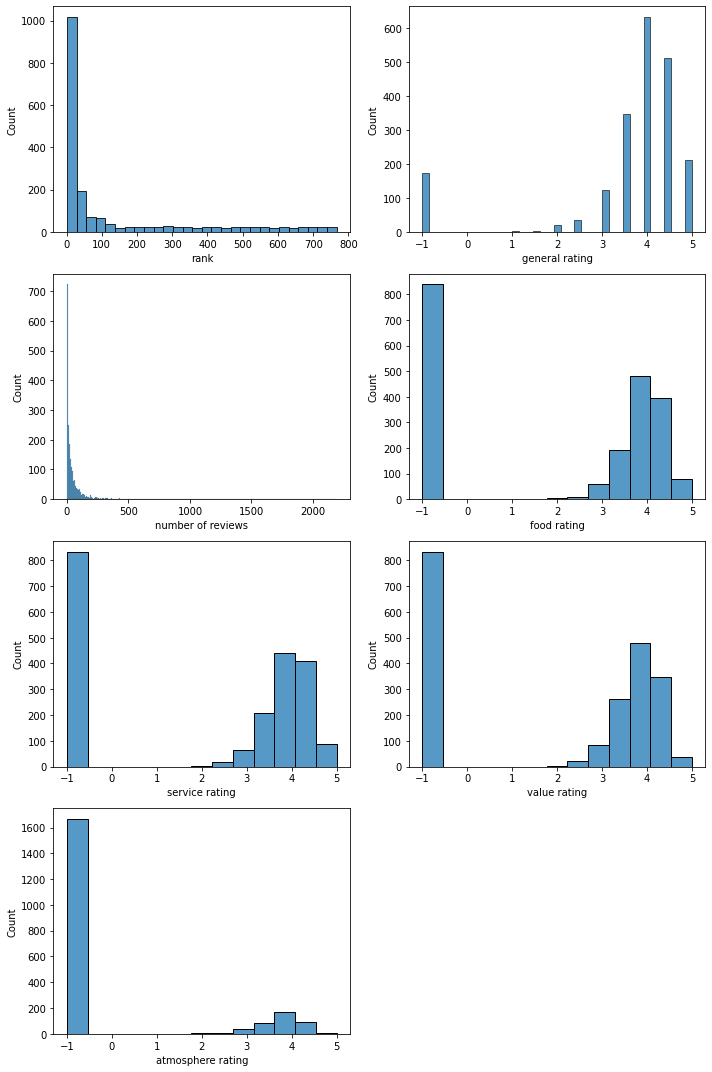

In [7]:
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    sns.histplot(df_train[col])
fig.tight_layout()
plt.show()

what we can see from these distributions is:
* most restaurants have a low rank (lower is better)
* ratings with value -1 mean that they are missing data, there is a lot of missing data visible


let's take a closer look at number of reviews

### number of reviews

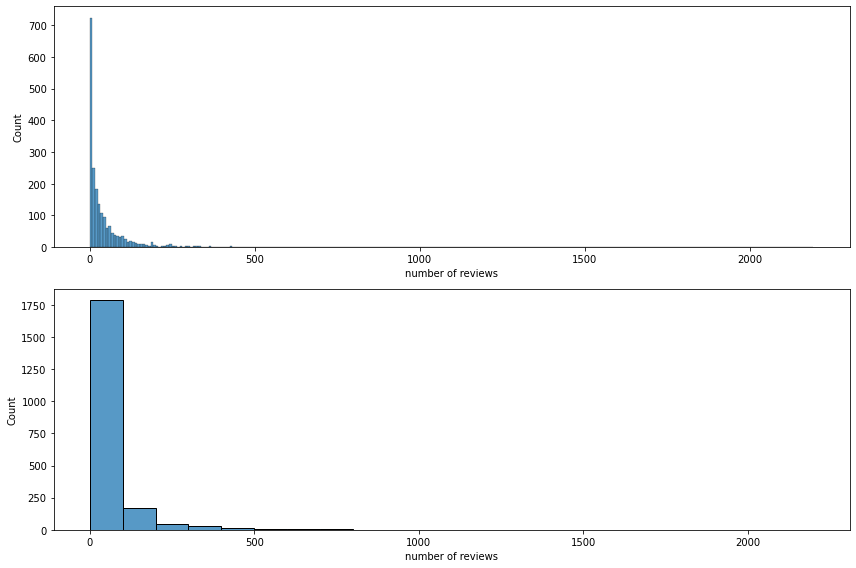

In [8]:
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.histplot(df_train["number of reviews"])
plt.subplot(2,1,2)
sns.histplot(df_train["number of reviews"],binwidth=100)
fig.tight_layout()
plt.show()


In [9]:
print(df_train["number of reviews"].value_counts())
zeros=df_train["number of reviews"].isna().sum()
print(f"number of missing values is {zeros}")

0.0       173
1.0       114
2.0       103
3.0        77
4.0        65
         ... 
1484.0      1
790.0       1
277.0       1
452.0       1
291.0       1
Name: number of reviews, Length: 266, dtype: int64
number of missing values is 0


There are a lot of restaurants with 0 reviews and no missing values. how many exactly?

In [10]:
perc_no_review=df_train["number of reviews"].value_counts()[0]/len(df_train)
print(f"{perc_no_review*100:.2f}% of the restaurants have no reviews!")


8.38% of the restaurants have no reviews!


We decide a treshhold for restaurants with low reviews = 4. So restaurants with 3 or less reviews we consider "hidden treasures"

In [11]:
perc_hidden=df_train["number of reviews"].value_counts()[0:3].sum()/len(df_train)
print(f"percentage of hidden treasures: {perc_hidden*100:.2f}%")

percentage of hidden treasures: 22.63%


are they really hidden treasures?
* what are the ratings of these hidden treasures? maybe they don't have many reviews bacause people don't eat there because of a bad rating or maybe bcause of the location.
* is there a correlation between the location of a restaurant and the fact if its a hidden treasure or not? maybe there are clusters? maybe big cities don't have these "hidden treasures"

we will come back to this later, first we can start by extracting the city

In [12]:
df_train['city'] = df_train['address'].str.split(" Belgium").str[0]
df_train['city'] = df_train['city'].str.split(",").str[-1]
df_train['city'] = df_train['city'].str.split(" ").str[1]

df_train

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id,city
2296,750.0,Borsalino - San Marino,3.0,164.0,$$ - $$$|Italian|Pizza|European,"Vlaanderenstraat 44-46, Ghent 9000 Belgium",+32 9 225 86 94,http://nl-nl.facebook.com/BorsalionSamMarino,NaN,True,NaN,False,False,3.0,3.0,2.5,3.5,NaN,NaN,No pricing available,"Italian, European, Pizza",Vegetarian Friendly,"Lunch, Dinner, Late Night","Takeout, Reservations, Outdoor Seating, Seatin...",740703,Ghent
2440,NaN,The Ugly Duck,-1.0,0.0,NaN,"Gerstenstraat 1A, Erembodegem 9320 Belgium",047132236,NaN,NaN,False,NaN,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,NaN,NaN,NaN,NaN,7046170,Erembodegem
2090,86.0,El Plaza Sint Niklaas,3.0,10.0,$$ - $$$,"Kapelstraat 100/42 Waasland Shopping Center, S...",+32 3 434 14 61,NaN,NaN,False,NaN,False,False,3.0,-1.0,3.0,-1.0,NaN,NaN,No pricing available,NaN,NaN,NaN,Reservations,12724321,Sint-Niklaas
1196,3.0,'T Lembeeks Hof,4.0,20.0,$$ - $$$|Steakhouse|Belgian|Dutch,"Eeklostraat 21, Lembeke 9971 Belgium",+32 9 377 60 85,https://www.tlembeekshof.com/,NaN,False,NaN,False,False,3.5,4.0,4.0,-1.0,NaN,NaN,No pricing available,"Steakhouse, Contemporary, Belgian, Dutch, Euro...",NaN,"Breakfast, Dinner","Seating, Reservations",16734458,Lembeke
1979,38.0,De Kolibrie,3.5,5.0,NaN,"Dreefstraat 21, Ninove 9400 Belgium",+32 494 44 74 50,http://www.dekolibrieninove.be/,NaN,False,dekolibrieninove@gmail.com,False,False,-1.0,-1.0,-1.0,-1.0,NaN,De Kolibrie: een plek waar tijd is voor (h)eer...,No pricing available,NaN,NaN,NaN,"Seating, Highchairs Available, Serves Alcohol,...",9592814,Ninove
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,5.0,De Wijngaard,4.5,3.0,Belgian|European|Pub,"Provincieweg 82 Borsbeke, Oost-Vlaanderen, Her...",+32 53 62 31 01,https://www.facebook.com/wijng,NaN,False,NaN,False,False,-1.0,-1.0,-1.0,-1.0,NaN,NaN,No pricing available,"Belgian, European, Pub",NaN,NaN,NaN,14080259,Herzele
620,1.0,Meneer Max,4.0,38.0,$$ - $$$|Belgian|International|European,"Ninovesteenweg 169, Erembodegem 9320 Belgium",+32 53 70 47 08,http://www.meneermax.be/,http://www.meneermax.be/#ons_menu,False,NaN,False,False,4.5,4.5,4.0,-1.0,\n,NaN,No pricing available,"Belgian, International, European",Vegetarian Friendly,"Lunch, Dinner","Reservations, Seating, Wheelchair Accessible, ...",13528623,Erembodegem
684,286.0,Dali Restaurant,4.0,45.0,$$ - $$$|Belgian|European,"Kasteellaan 51, Ghent 9000 Belgium",+32 9 235 04 00,http://www.restaurant-dali.be/,https://restaurant-dali.be/nl/home/,True,info@castelnou.be,False,False,4.0,4.5,4.5,-1.0,"At restaurant Dali, you can enjoy a delicious ...",NaN,No pricing available,"Belgian, European",NaN,"Breakfast, Lunch, Dinner, Drinks","Reservations, Seating, Wheelchair Accessible, ...",10025700,Ghent
1919,630.0,Pizza Santa Gent,5.0,1.0,Italian,"Voskenslaan 405, Ghent 9000 Belgium",+32 470 32 53 21,http://www.pizza-santa-gent.be/,NaN,True,maxim@pizzasanta.be,False,False,-1.0,-1.0,-1.0,-1.0,Kraakverse pizza's met originele toppings. Lok...,Kraakverse pizza's met originele toppings. Lok...,No pricing available,Italian,NaN,"Lunch, Dinner",NaN,23405208,Ghent


we can also use some external libraries to extract latitute and longitude from the full address (so its easier to plot)

In [13]:
df_train["address"]

2296           Vlaanderenstraat 44-46, Ghent 9000 Belgium
2440           Gerstenstraat 1A, Erembodegem 9320 Belgium
2090    Kapelstraat 100/42 Waasland Shopping Center, S...
1196                 Eeklostraat 21, Lembeke 9971 Belgium
1979                  Dreefstraat 21, Ninove 9400 Belgium
                              ...                        
1815    Provincieweg 82 Borsbeke, Oost-Vlaanderen, Her...
620          Ninovesteenweg 169, Erembodegem 9320 Belgium
684                    Kasteellaan 51, Ghent 9000 Belgium
1919                  Voskenslaan 405, Ghent 9000 Belgium
440                     Driegoten 64a, Hamme 9220 Belgium
Name: address, Length: 2064, dtype: object

### Correlation between rank and restaurant type?

In the next code block we try to find a correlation between the popularity of a restaurant and the type of restaurant. For example are Chinese restaurants the most popular? We find this out by using the average rank as popularity measure and the tags as restaurant type.

In [14]:
df_train_tags_cleaned = df_train.copy()

# splitting all the tags
df_train_tags_cleaned["tags"] = df_train_tags_cleaned["tags"].str.split("|")

# converting every tag into a new column
df_train_tags_cleaned = df_train_tags_cleaned.explode('tags').reset_index(drop=True)

# drop all tags with $ in
df_train_tags_cleaned = df_train_tags_cleaned.groupby("tags").filter(lambda x : str(x).count("$") == 0)

# make a copy for in a later stage
df_train_tags_cleaned_copy = df_train_tags_cleaned.copy()

# keep the rank and tags column
df_train_tags_cleaned = df_train_tags_cleaned[["rank", "tags"]]



# group by tag and take the mean of all the ranks
df_train_tags_cleaned = df_train_tags_cleaned.groupby("tags").mean()
df_train_tags_cleaned = df_train_tags_cleaned.dropna()
df_train_tags_cleaned = df_train_tags_cleaned.sort_values(by=["rank"]) # sorting
df_train_tags_cleaned


,rank
tags,
Cajun & Creole,3.000000
Japanese sweets parlour,6.000000
German,6.500000
Central European,6.750000
Egyptian,7.500000
...,...
Middle Eastern,359.333333
Filipino,366.000000
Halal,527.000000


In the table above we can see which restaurant type is the most popular. It might be interesting to start a restaurant with one of the top ranked types to be popular.

### Where to open my restaurant?

If you know what type restaurant you want to open, a very important decision is to choose where to open your restaurant.
We want to know the following questions:

* Which city is has the highest average ranked restaurants?
* How many type restaurants are there in every city? (for example how many Chinese restaurants in Gent, Antwerpen, ...)

The answer on the following questions can give us insight on the location of the restaurant.

In the following codeblock we answer the first question, even though it's not sorted on the average rank. The reason why is because you would see as first the cities with one restaurant and a low (good) ranking. This doesn't tell us much, this is why we sort first on the amount of restaurants.

In [15]:
df_train_city = df_train[["city", "rank"]]

count = df_train_city.groupby("city").count()

df_train_city = df_train_city.dropna()
df_train_city = df_train_city.groupby("city").mean()
df_train_city["amount of restaurants"] = count
df_train_city = df_train_city.sort_values(by=["amount of restaurants", "rank"], ascending=[False, True])


df_train_city


,rank,amount of restaurants
city,,
Ghent,378.576985,617
Aalst,63.576923,104
Sint-Niklaas,53.311111,90
Dendermonde,33.377358,53
Lokeren,24.414634,41
...,...,...
Massemen,2.000000,1
Vurste,2.000000,1
Wannegem-Lede,2.000000,1


In the next codeblock we answer the second question. For every restaurant type you can see how many there are in each city (if the city is not mentionned it means 0)

In [16]:
df_train_city_type = df_train_tags_cleaned_copy[["city", "tags"]]
df_train_city_type = df_train_city_type.groupby(["tags", "city"])["city"].count().to_frame()
df_train_city_type = df_train_city_type.rename(columns={"city": "city_count"})


df_train_city_type

# Find how many Chinese restaurants there are. The cities that are missing means that there aren't any there
# df_train_city_type.loc["Chinese"]


city_count
tags       city                      
Afghan     Geraardsbergen           1
           Ghent                    1
African    Eeklo                    1
           Ghent                    4
           Temse                    1
...                               ...
Vietnamese Steendorp                1
Wine Bar   Ghent                    8
           Lokeren                  1
           Oudenaarde               1
           Temse                    1

[1190 rows x 1 columns]

### Atmosphere clustering
Next we want to see if there are clusterings formed of restaurants with a high atmosphere rating. To start we plot every restaurant on the map

In [17]:
coords = pd.read_csv("coordinaten2.csv")

df_train_coords = df_train.merge(coords,on="id")

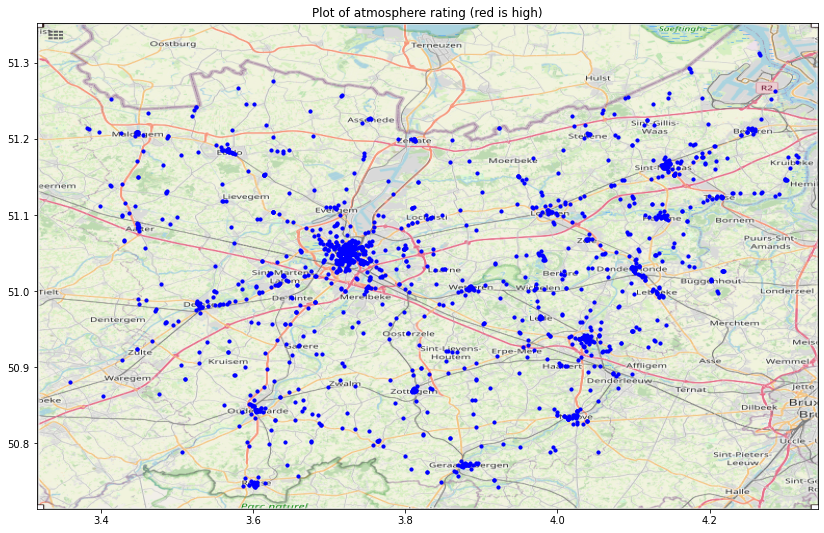

In [18]:
Bbox = (3.3151,4.3423,50.7139,51.3529)
map = plt.imread("east_flanders.png")

figure, ax = plt.subplots(figsize = (14,16))

ax.scatter(df_train_coords.longitude, df_train_coords.latitude, zorder=1, alpha= 1, c='b',s=10)

ax.set_title('Plot of atmosphere rating (red is high)')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])

ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')

To see if there is clustering, we map all the restaurants with a rating higher than 4.5 in red.

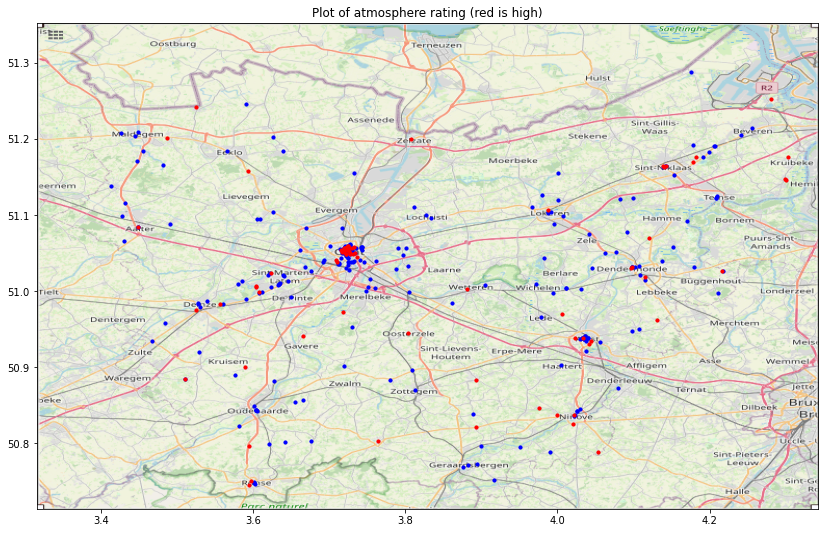

In [19]:
df_train_coords = df_train_coords.replace(-1, np.nan)

df_train_coords_low = df_train_coords[df_train_coords["atmosphere rating"] < 4.5]
df_train_coords_high = df_train_coords[df_train_coords["atmosphere rating"] >= 4.5]

Bbox = (3.3151,4.3423,50.7139,51.3529)
map = plt.imread("east_flanders.png")

figure, ax = plt.subplots(figsize = (14,16))

ax.scatter(df_train_coords_low.longitude, df_train_coords_low.latitude, zorder=1, alpha= 1, c='b',s=10)
ax.scatter(df_train_coords_high.longitude, df_train_coords_high.latitude, zorder=1, alpha= 1, c='r',s=10)

ax.set_title('Plot of atmosphere rating (red is high)')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])

ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')


You can see that there are two clusters: Gent and Sint-Niklaas. Those places might have a pleasant ambience and can be a good place to locate a new restaurant.

### Restaurant features

When you start a new restaurant, you certainly don't want to offer less features than other restaurants. It can be handy to know which restaurant features there are available, but also which ones are not frequently offered. That's maybe where you can offer more.

In the next codeblock we make a table with the occurence the mentioned restaurant features.

In [29]:
df_train_copy = df_train.copy()
df_train_copy["restaurant features"] = df_train_copy["restaurant features"].str.split(",")
df_train_copy = df_train_copy.filter(["restaurant features", "rank"])

df_train_features_exploded = df_train_copy.explode('restaurant features').reset_index(drop=True)
df_train_features_exploded["restaurant features"] = df_train_features_exploded["restaurant features"].str.strip().str.lower()
df_train_features_exploded = df_train_features_exploded.dropna()

df_train_features_exploded = df_train_features_exploded.groupby("restaurant features").count()
df_train_features_exploded = df_train_features_exploded.rename(columns={"rank": "occurences"})
df_train_features_exploded = df_train_features_exploded.sort_values(by=["occurences"], ascending=False)

df_train_features_exploded


,occurences
restaurant features,
reservations,1251
seating,1224
table service,1185
serves alcohol,879
wheelchair accessible,710
outdoor seating,479
highchairs available,342
takeout,335
accepts credit cards,332


### International popularity

Which restaurants have international reviews? Are international tourists more likely to eat in big cities or in small, local restaurants? To detect international reviews we made only a difference between languages that uses ASCII characters between 0-256. Anything higher we assume is international (such as Chinese, Arabic, ...)



In [21]:
def language_detector(text):
    """
    true means it's western language (English, Dutch, ...)
    false means it's an exotic language (Chinese, Arabic, ...)
    """
    text = str(text)
    west_count = 0
    exotic_count = 0
    for kar in text:
        ascii = ord(kar)
        if ascii > 256:
            exotic_count += 1
        else:
            west_count += 1
    
    return west_count > exotic_count

df_reviews = pd.read_csv("tripadvisor_dataset/reviews.csv")
df_reviews_train, df_reviews_test = train_test_split(df_reviews, test_size=0.2)

df_reviews_train["western"] = df_reviews_train["review"].apply(lambda x: language_detector(x))

df_reviews_train_false = df_reviews_train[df_reviews_train.western == False]
df_reviews_train_false


,id,reviewer name,title,date,rating,review,western
132440,6380688,KouchanNo1,クチコミする価値無し,"July 19, 2017",1.0,軽くランチをと思いここにしました。\n料理が待てど暮らせど出てきません。\n結局、1時間半食...,False
121280,6953024,MIJUNG K,위치도 음식도 매우 만족!,"October 10, 2016",5.0,"일요일 브런치을 가볍게 강가에 마련된 야외테이블에서 했다. 키쉬, 파니니, 카푸치노...",False
36332,1913510,Tatiana G,"Хорошее место, отличное расположение","July 8, 2015",4.0,Были в этрм заведении дважды. В первый раз заш...,False
41565,796954,markandeu,Необычный и крутой ресторан Гента,"January 18, 2017",4.0,Ресторан Pakhuis находится в самом центре Гент...,False
9621,4014169,KseniyaDerevyanko,Заслуженные 2*,"March 30, 2018",5.0,После многочисленных подтверждений нашего посе...,False
...,...,...,...,...,...,...,...
24737,3774380,tyapatsuD,雰囲気も味も良い,"March 29, 2020",4.0,ゲントの時計塔の真下にあります。店内もよいのですがここはテラス席に陣取って風景を眺めながら食...,False
128780,7141012,Надежда О,Все во фритюре,"April 9, 2016",5.0,Заехали мы туда случайно по пути из аэропорта ...,False
33854,3448259,C5764TB_,παρα πολυ καλο,"April 15, 2018",5.0,Το προτεινουμε χωρις δευτερη σκεψη σε οσους απ...,False
31040,7987911,NataGan,Удивительное вкусное место,"October 21, 2019",5.0,"Проходили мимо, решили зайти выпить по бокальч...",False


In [22]:

df_reviews_train_false = df_reviews_train_false.groupby("id").count()

df_reviews_train_false = df_reviews_train_false.filter(["id", "date"])
df_reviews_train_false = df_reviews_train_false.rename(columns={"date": "occurences"})
df_reviews_train_false = df_reviews_train_false.sort_values(by=["occurences"], ascending=False)

df_reviews_train_false

,occurences
id,
740683,46
814598,38
1058490,31
796954,30
1913510,26
...,...
4083204,1
740622,1
3954887,1


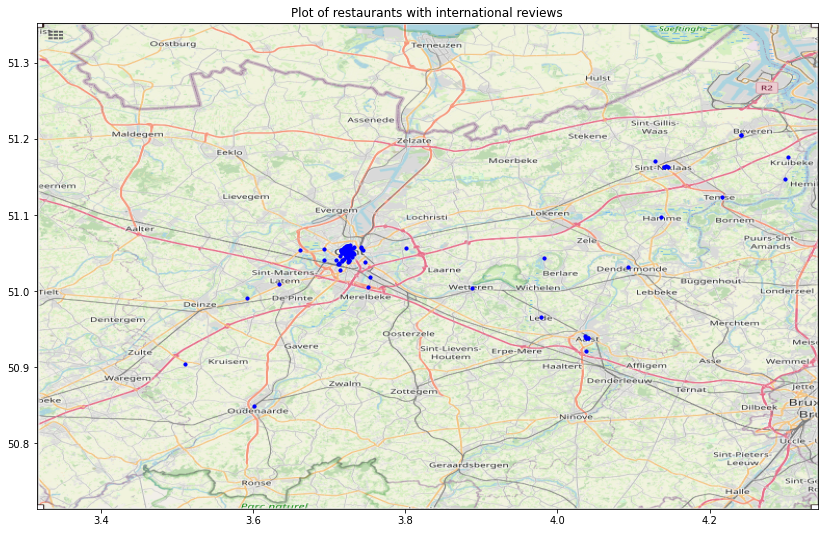

In [23]:

df_reviews_train_merged_coords = df_reviews_train_false.merge(coords, on="id")

Bbox = (3.3151,4.3423,50.7139,51.3529)
map = plt.imread("east_flanders.png")

figure, ax = plt.subplots(figsize = (14,16))

ax.scatter(df_reviews_train_merged_coords.longitude, df_reviews_train_merged_coords.latitude, zorder=1, alpha= 1, c='b',s=10)

ax.set_title('Plot of restaurants with international reviews')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])

ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')

We can clearly see a cluster of restaurants in Ghent. Popular cities attract more international customers than small local cities.

It's also interesting to see to what restaurant type international people comes the most

In [24]:
df_reviews_train_false_merged = df_reviews_train_false.merge(df_train, on="id")
df_reviews_train_false_merged["tags"] = df_reviews_train_false_merged["tags"].str.split("|")
df_reviews_train_false_merged = df_reviews_train_false_merged.explode('tags').reset_index(drop=True)
df_reviews_train_false_merged = df_reviews_train_false_merged.groupby("tags").filter(lambda x : str(x).count("$") == 0)
df_reviews_train_false_merged = df_reviews_train_false_merged[["occurences", "tags"]]
df_reviews_train_false_merged = df_reviews_train_false_merged.groupby("tags").sum().sort_values(by=["occurences"], ascending=False)
df_reviews_train_false_merged

,occurences
tags,
Belgian,492
European,386
Vegetarian Friendly,170
Seafood,99
Bar,89
French,82
Barbecue,79
Dutch,79
Cafe,51


It makes sense that when people travel they want to try the local cuisine. That is probably why Belgian cuisine is the most popular.

ideas:
* zoek correlatie tussen rank en een van de rating features
* mss tussen de rating features onderling? dat ze zelfde waarde aangeven en dus overbodig zijn?
* kijk of er clustering is van restaurant prijs en locatie of restaurant prijs en type restaurant. vb er zijn veel meer japanse restaurants in de dure categorie dan japanse restaurants in de goedkope ...
* zie github voor meer